### IMPORTANT: There will be no extension of the homework deadline. E-mails sent for extension requests will not be considered. So please start working early on your homework and manage your time well.

In [1]:
#Feyza EKSEN
#504201522
#########################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Part 1: Optimization (75 points)

### Background

**Gradient Descent**: the parameters are updated in the direction of negative gradient. In equation form: 
### <center> $ \textbf{w}^k =\textbf{w}^{k-1} - \alpha \nabla g(\textbf{w}^{k-1}) $ <center> 

    
**Newton's method** finds the local minima by moving towards to stationary points of second order Taylor series approximation, with the following update formula:
### <center> $\textbf{w}^k = \textbf{w}^{k-1} - (\nabla^2 g(\textbf{w}^{k-1}))^{-1} \nabla g(\textbf{w}^{k-1})$ <center>
    
In this part, you will try to optimize given 2 multivariate functions using Gradient Descent and Newton's Method.
   
- $g(\textbf{w}) = -sin(\pi \textbf{w}^T \textbf{w}) + ln(\textbf{w}^T \textbf{w}) $
- $g(\textbf{w}) = \textbf{w}^T Q \textbf{w} + r^T \textbf{w}  $
    

### Part 1.1 Optimize Function 1 (30 Points)
    
We will experiment with both optimization methods on function 1:

### <center> $g(\textbf{w}) = -sin(\pi \textbf{w}^T \textbf{w}) + ln(\textbf{w}^T \textbf{w}) $ </center>

where w is a vector with 2 elements as $ \textbf{w} = [\textbf{w}_1    \textbf{w}_2]^T $

You are given the following plotter function. 

In [2]:
def make_colorspec(w_hist):
    # make color range for path
    s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
    s.shape = (len(s),1)
    t = np.ones(len(w_hist[round(len(w_hist)/2):]))
    t.shape = (len(t),1)
    s = np.vstack((s,t))
    colorspec = []
    colorspec = np.concatenate((s,np.flipud(s)),1)
    colorspec = np.concatenate((colorspec,np.zeros((len(s),1))),1)
    return colorspec

def draw_weight_path(ax,w_hist,g):
    # make colors for plot
    colorspec = make_colorspec(w_hist)
    
    arrows = True

    ### plot function decrease plot in right panel
    for j in range(len(w_hist)):  
        w_val = w_hist[j]

        # plot each weight set as a point
        ax.scatter(w_val[0],w_val[1],g(w_val),s = 80,color = colorspec[j],edgecolor = 'black',linewidth = 2*math.sqrt((1/(float(j) + 1))),zorder = 3)
        
        # plot connector between points for visualization purposes
        if j > 0:
            pt1 = np.array([w_hist[j-1][0], w_hist[j-1][1], np.squeeze(g(w_hist[j-1]))])
            pt2 = np.array([w_hist[j][0], w_hist[j][1], np.squeeze(g(w_hist[j]))])
            
            # if points are different draw error
            if np.linalg.norm(pt1 - pt2) > 0.1 and arrows == True:
                
                ax.plot([pt1[0],pt2[0]], [pt1[1], pt2[1]],[pt1[2],pt2[2]] ,  color ='black',linewidth = 2, zorder=2)
                

def plotFunction(g, w_history=None, view=(50,80),w_min=-1.0,w_max=1.0):
    x = np.linspace(w_min, w_max, 100)
    y = np.linspace(w_min, w_max, 100)

    X, Y = np.meshgrid(x, y)

    Z = np.empty([100,100])
    vectorize_w = lambda w0, w1: np.array([[w0], [w1]])
    for i in range(100):
        for j in range(100):
            Z[i,j] = np.squeeze(g(vectorize_w(X[i,j], Y[i,j])))
    
    plt.figure(figsize=(8,8))
    ax = plt.axes(projection='3d')
    ax.view_init(view[0], view[1])
    
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)
    
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('g(w)')
    ax.set_title('Function surface');
    
    if w_history:
        draw_weight_path(ax, w_history, g)

First, let's define and plot the given function in the following cell.

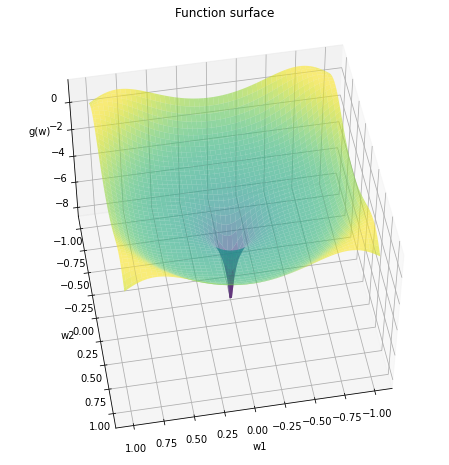

In [3]:
# We define the function 1
g = lambda w: -np.sin(np.pi*np.sum(w**2)) + np.log(np.sum(w**2))

# Now, we can call the plotFunction to plot surface plot
plotFunction(g)

**(15 points)** Complete the following **gradient descent** function.
 - You need to write down the first derivative function for the function g above and implement the update rule. You need to calculate the gradient by yourself!
 - You need to take steps until the stopping criteria is met. **Stopping criteria** is the Euclidian distance between consecutive w vectors to get below 1e-02.
    - Write the gradient descent loop as it breaks when the Euclidian distance between $w_{k-1}$ and $w_{k}$ is smaller than 1e-02.

In [4]:
def gradient_f1(w):
    grad = np.zeros((2))
    temp = -np.cos(np.pi*np.sum(w**2)) 
    grad[0] = (temp * np.pi * (2*w[0])) + (2*w[0]/np.sum(w**2))
    grad[1] = (temp * np.pi * (2*w[1])) + (2*w[1]/np.sum(w**2))
    
    return grad
    
def gradientDescent_func1(g, lr = 1e-1, w_0 = None):
    '''
        lr: learning rate
        w_0: initial w
    '''
    #Initialize variables
    w = w_0
    w_history = [w] #List of w's in each iteration, used to plot
    prev_w = w
    #Gradient Descent Steps until the stopping criteria is met
    while True:
        w = w - np.squeeze(lr * gradient_f1(w))
        w_history.append(w)
        if np.linalg.norm(w - prev_w) < 1e-02:
            break
        prev_w = w  
        
    return w, w_history

You can run and test the gradient descent function with given w_0 and learning rate parameters and plot the weight path at the following cell.

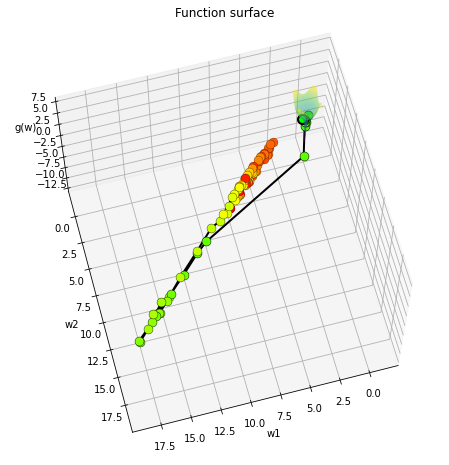

In [5]:
w, w_history = gradientDescent_func1(g, lr=0.02, w_0=np.array([0.5,0.5]))

plotFunction(g, w_history, view=(65,75))

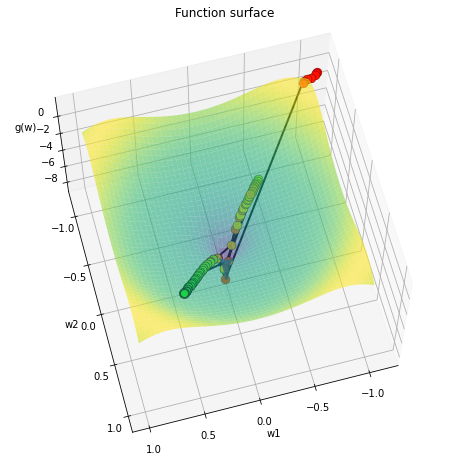

In [6]:
w, w_history = gradientDescent_func1(g, lr=0.01, w_0=np.array([0.5,0.5]))

plotFunction(g, w_history, view=(65,75))

**(10 points)** Complete the gradient descent function, but this time, use **adaptive learning rate(step size)** instead of a constant learning rate (Refer to the tutorial 4 for adaptive learning rate strategies).  

Update the learning rate using the following formula:

$  \alpha = \dfrac{\alpha}{(1 + t * d)}$ 

$  t = t + 1 $

where $\alpha$ is the learning rate, $t$ is the time step, starting from 0 and increasing by 1 at each iteration and $d$ is a hyperparameter controlling how quickly the learning rate decays.

 - You can copy part of codes from the first gradient descent function above as the gradient and the update rule stays the same
 - As above, You need to take steps until the stopping criteria is met. **Stopping criteria** is the Euclidian distance between consecutive w vectors to get below 1e-02.
    - Write the gradient descent loop as it breaks when the Euclidian distance between $w_{k-1}$ and $w_{k}$ is smaller than 1e-02.





In [7]:
def gradientDescent_func1_adaptiveLR(g, lr = 1e-1, w_0 = None, d_init = 0.1):
    '''
        lr: learning rate
        w_0: initial w
        d_init: initial d
    '''
    #Initialize variables
    w = w_0
    w_history = [w] #List of w's in each iteration, used to plot
    prev_w = w
    t = 0
    
    #Gradient Descent Steps until the stopping criteria is met (Don't forget to update Learning Rate!)
    while True:
        w = w - np.squeeze(lr * gradient_f1(w)) # i have already defined gradient function above
        w_history.append(w)
        if np.linalg.norm(w - prev_w) < 1e-02:
            break
        prev_w = w
        t += 1
        lr = lr / (1 + t * d_init)
        
    return w, w_history

You can run and test the gradient descent function with given w_0 and learning rate parameters and plot the weight path at the following cell.

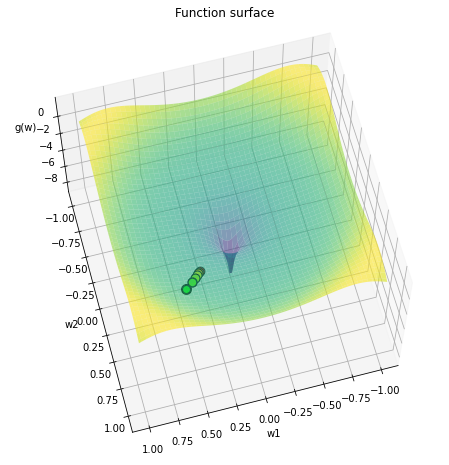

In [8]:
w, w_history = gradientDescent_func1_adaptiveLR(g, lr=0.03, w_0=np.array([0.5,0.5]), d_init=0.15)

plotFunction(g, w_history, view=(65,75))

**(5 points)** Answer following questions.
 - Comparing both of the approachs, what did you notice? What were the main differences between both approaches? Explain in detail. Which approach worked better? Why?
 - Could it be better to use Newton's method to optimize this function? Explain why.

$\color{red}TODO$ _Double click to insert your answer._ 

### Part 1.2 Optimize Function 2 (45 Points)
    
We will experiment with both optimization methods on function 2:

### <center> $g(\textbf{w}) = \textbf{w}^T Q \textbf{w} + r^T \textbf{w} $ </center>

where w is a vector with 2 elements as $\textbf{w} = \begin{bmatrix} \textbf{w}_1 \\ \textbf{w}_2\end{bmatrix} $, Q is a $2 \times 2$ matrix as $Q =\begin{bmatrix}2 & 1 \\ 1 & 2\end{bmatrix}$ and $ r =\begin{bmatrix}2 \\ 5\end{bmatrix}$ 


First, let's define and plot the function.

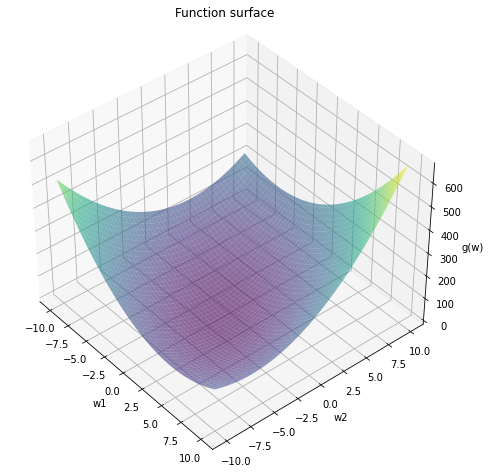

In [9]:
# We define the function 2
g = lambda w: (w.T @ np.array([[2,1], [1,2]]))@w + np.array([[2,5]])@w

# Now, we can call the plotFunction to plot surface plot
plotFunction(g,view=(40,-40),w_min=-10, w_max=10)


**(10 points)** Calculate the Hessian matrix for the given function where the Hessian matrix will be in form of:

### <center> $ H = \begin{bmatrix} \frac{\partial^2 g}{\partial^2 \textbf{w}_1} & \frac{\partial^2 g}{\partial \textbf{w}_1 \partial \textbf{w}_2} \\ \frac{\partial^2 g}{\partial \textbf{w}_2 \partial \textbf{w}_1} & \frac{\partial^2 g}{\partial^2 \textbf{w}_2} \end{bmatrix} $ </center>

Hint: You can write the given quadratic function as: 

### <center> $g(\textbf{w}) = \begin{bmatrix}\textbf{w}_1 & \textbf{w}_2\end{bmatrix} \begin{bmatrix}2 & 1 \\ 1 & 2\end{bmatrix} \begin{bmatrix}\textbf{w}_1 \\ \textbf{w}_2\end{bmatrix} + \begin{bmatrix}2 & 5\end{bmatrix} \begin{bmatrix}\textbf{w}_1 \\ \textbf{w}_2\end{bmatrix} $ </center>

Calculate the given derivatives, fill the Hessian matrix and find the eigenvalues of the Hessian matrix with step-by-step solution. 

$ \frac{\partial g}{\partial \textbf{w}_1} = 4\textbf{w}_1 + 2\textbf{w}_2 + 2$
$ \frac{\partial g}{\partial \textbf{w}_2} = 4\textbf{w}_2 + 2\textbf{w}_1 + 5 $
$ \frac{\partial^2 g}{\partial^2 \textbf{w}_1} = 4 $
$ \frac{\partial^2 g}{\partial \textbf{w}_1 \partial \textbf{w}_2} = 2 $
$\frac{\partial^2 g}{\partial \textbf{w}_2 \partial \textbf{w}_1} = 2 $
$\frac{\partial^2 g}{\partial^2 \textbf{w}_2} = 4 $ 



### <center> $ H = \begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix} $ </center>

### <center> $ det(H- \lambda I) = 0 $ </center>

### <center> $ det(\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix} - \begin{bmatrix} \lambda & 0 \\ 0 & \lambda \end{bmatrix}) = 0 $ </center>

### <center> $ det(\begin{bmatrix} 4-\lambda & 2 \\ 2 & 4-\lambda \end{bmatrix}) = 0 $ </center>

### <center> $ (4-\lambda)(4-\lambda) - (2)(2) = 0 $ </center>

### <center> $ \lambda^2 - 8\lambda + 12 = 0 $ </center>

### <center> $ (\lambda - 6)(\lambda - 2) = 0 $ </center>

### <center> $ \lambda_1 = 2 $ $\lambda_2 = 6 $</center>

Is is safe to use Newton's method for optimizing this function? Comment on it referring to the calculations you made before. 

Yes, it is safe to use Newton's method for optimizing this function. Since all eigenvalues are positive it is a convex function therefore it only has one minimum. Newton's method converges faster when the loss function is convex which is our case here. It is dangerous to use Newton's method for optimizing the non-convex function since it might stuck at maximum and not converge, which is not our case here.

**(10 points)** Complete the following **Newton's method** function.
 - You need to implement the update rule for Newton's method where you already calculated the Hessian matrix and the first gradient. The update rule is:
    ### <center> $\textbf{w}^k = \textbf{w}^{k-1} - (\nabla^2 g(\textbf{w}^{k-1}))^{-1} \nabla g(\textbf{w}^{k-1})$ <center>
  
 - You can use np.linalg.inv() function to calculate the inverse of Hessian. Be careful with the dimensions for matrix multiplications as the dimension of w should be $2 \times 1$ this time.
 - You need to take steps until the stopping criteria is met. **Stopping criteria** is the Euclidian distance between consecutive w vectors to get below 1e-02.
    - Write the gradient descent loop as it breaks when the Euclidian distance between $w_{k-1}$ and $w_{k}$ is smaller than 1e-02. You may not include $w_{k}$ in the weight history to calculate the number of iterations precisely.

In [10]:
def NewtonsMethod_func2(g, w_0 = None):
    '''
        w_0: initial w
    '''
    #Initialize variables
    epsilon = 1e-6 # Add it to denominator of update rule to avoid division by zero # TODO: couldn't understand its usage
    
    w = w_0
    w_history = [w] #List of w's in each iteration, used to plot

    Q = np.array([[2, 1], [1, 2]]) # this value doesn't change during iterations
    r = np.array([[2], [5]]) # this value doesn't change during iterations
    
    #Gradient Descent Steps until the stopping criteria is met
    while True:
        # Code the gradient functions here.
        grad_1st = 2 * np.dot(Q, w) + r # 2Qw + r
        H = 2 * Q # 2Q
        inv_H = np.linalg.inv(H)
        
        prev_w = w
        # take gradient step
        w = w - np.dot(inv_H, grad_1st)
        
        if np.linalg.norm(w-prev_w) < 1e-02: # stopping criteria
            print(f"number of iterations {len(w_history)}\nw_0\n{w_0}\nfound minimum\n{w}")
            break
            
        # update path containers
        w_history.append(w)
        
    return w, w_history

You can run and test the Newton's method function with different w_0 values and plot the weight path at the following cell.

number of iterations 2
w_0
[[9]
 [9]]
found minimum
[[ 0.16666667]
 [-1.33333333]]


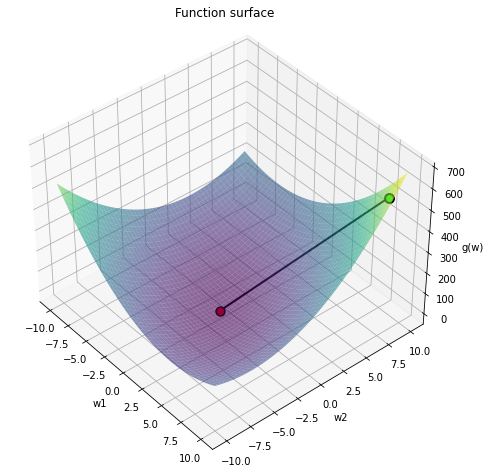

In [11]:
w, w_history = NewtonsMethod_func2(g, w_0=np.array([[9],[9]]))

# Squeeze w vectors for plotting
for i in range(len(w_history)):
    w = w_history[i]
    w_history[i] = np.squeeze(w)

plotFunction(g, w_history, view=(40,-40),w_min=-10, w_max=10)

number of iterations 2
w_0
[[7]
 [7]]
found minimum
[[ 0.16666667]
 [-1.33333333]]


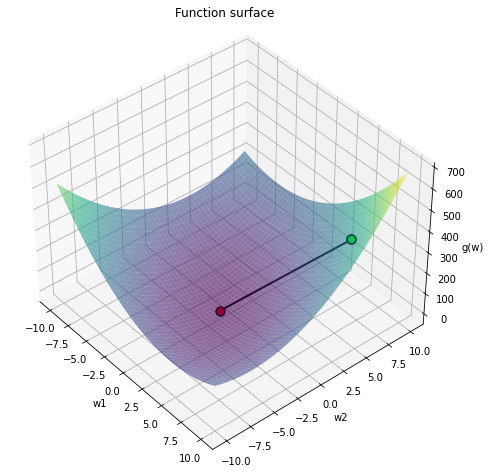

In [12]:
w, w_history = NewtonsMethod_func2(g, w_0=np.array([[7],[7]]))

# Squeeze w vectors for plotting
for i in range(len(w_history)):
    w = w_history[i]
    w_history[i] = np.squeeze(w)

plotFunction(g, w_history, view=(40,-40),w_min=-10, w_max=10)

number of iterations 2
w_0
[[5]
 [5]]
found minimum
[[ 0.16666667]
 [-1.33333333]]


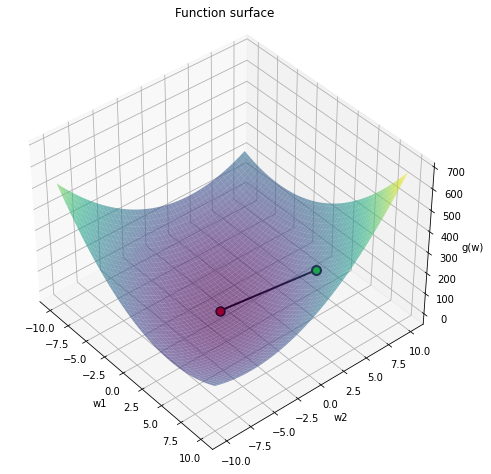

In [13]:
w, w_history = NewtonsMethod_func2(g, w_0=np.array([[5],[5]]))

# Squeeze w vectors for plotting
for i in range(len(w_history)):
    w = w_history[i]
    w_history[i] = np.squeeze(w)

plotFunction(g, w_history, view=(40,-40),w_min=-10, w_max=10)

number of iterations 2
w_0
[[3]
 [3]]
found minimum
[[ 0.16666667]
 [-1.33333333]]


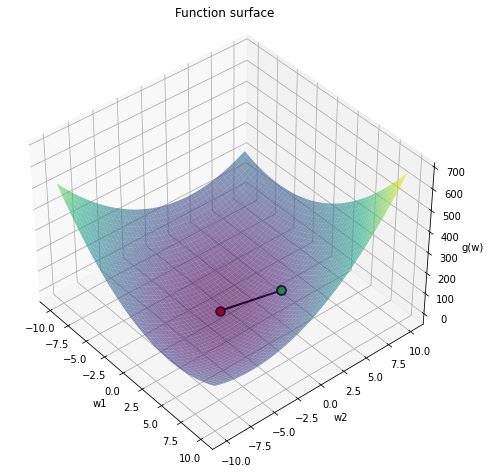

In [14]:
w, w_history = NewtonsMethod_func2(g, w_0=np.array([[3],[3]]))

# Squeeze w vectors for plotting
for i in range(len(w_history)):
    w = w_history[i]
    w_history[i] = np.squeeze(w)

plotFunction(g, w_history, view=(40,-40),w_min=-10, w_max=10)

number of iterations 2
w_0
[[1]
 [1]]
found minimum
[[ 0.16666667]
 [-1.33333333]]


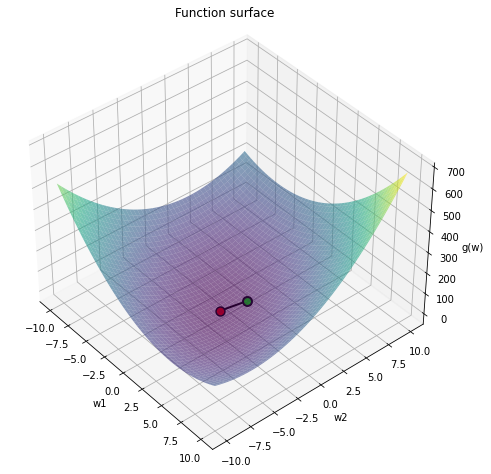

In [15]:
w, w_history = NewtonsMethod_func2(g, w_0=np.array([[1],[1]]))

# Squeeze w vectors for plotting
for i in range(len(w_history)):
    w = w_history[i]
    w_history[i] = np.squeeze(w)

plotFunction(g, w_history, view=(40,-40),w_min=-10, w_max=10)

**(10 points)** Complete the gradient function below for optimizing the function 2. You already calculated the first derivative, you can use it directly. Stopping criteria is the same with the Newton's method.

In [16]:
def gradientDescent_func2(g, lr = 1e-1, w_0 = None):
    '''
        lr: learning rate
        w_0: initial w
    '''
    #Initialize variables
    w = w_0
    w_history = [w] #List of w's in each iteration, used to plot

    Q = np.array([[2, 1], [1, 2]]) # this value doesn't change during iterations
    r = np.array([[2], [5]]) # this value doesn't change during iterations
    
    while True:
        gradient = 2 * np.dot(Q, w) + r # 2Qw + r
        
        prev_w = w
        # take gradient step
        w = w - lr * gradient
        
        if np.linalg.norm(w-prev_w) < 1e-02: # stopping criteria
            print(f"number of iterations {len(w_history)}\nw_0\n{w_0}\nfound minimum\n{w}")
            break
            
        # update path containers
        w_history.append(w)  
        
    return w, w_history

You can run and test the gradient descent function with different w_0 values and plot the weight path at the following cell.

number of iterations 15
w_0
[[9]
 [9]]
found minimum
[[ 0.14028868]
 [-1.30693476]]


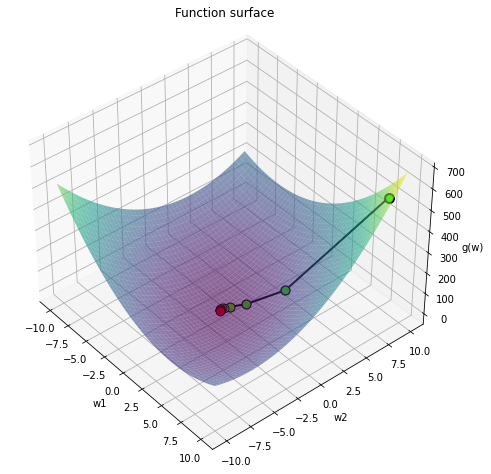

In [17]:
w, w_history = gradientDescent_func2(g, lr= 0.1, w_0=np.array([[9],[9]]))

# Squeeze w vectors for plotting
for i in range(len(w_history)):
    w = w_history[i]
    w_history[i] = np.squeeze(w)

plotFunction(g, w_history, view=(40,-40),w_min=-10, w_max=10)

number of iterations 15
w_0
[[7]
 [7]]
found minimum
[[ 0.14028653]
 [-1.30693691]]


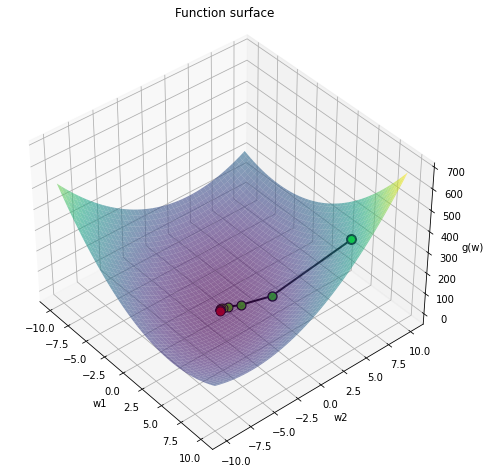

In [18]:
w, w_history = gradientDescent_func2(g, lr= 0.1, w_0=np.array([[7],[7]]))

# Squeeze w vectors for plotting
for i in range(len(w_history)):
    w = w_history[i]
    w_history[i] = np.squeeze(w)

plotFunction(g, w_history, view=(40,-40),w_min=-10, w_max=10)

number of iterations 15
w_0
[[5]
 [5]]
found minimum
[[ 0.14028438]
 [-1.30693906]]


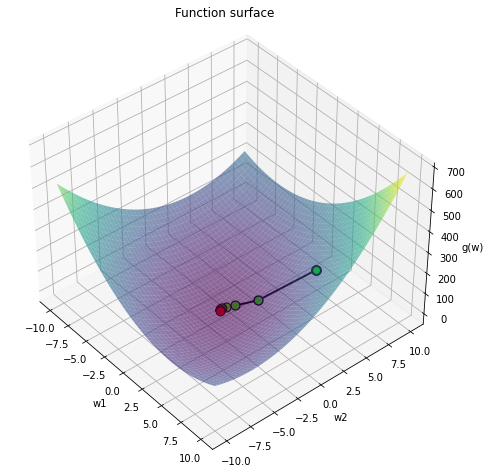

In [19]:
w, w_history = gradientDescent_func2(g, lr= 0.1, w_0=np.array([[5],[5]]))

# Squeeze w vectors for plotting
for i in range(len(w_history)):
    w = w_history[i]
    w_history[i] = np.squeeze(w)

plotFunction(g, w_history, view=(40,-40),w_min=-10, w_max=10)

number of iterations 15
w_0
[[3]
 [3]]
found minimum
[[ 0.14028224]
 [-1.30694121]]


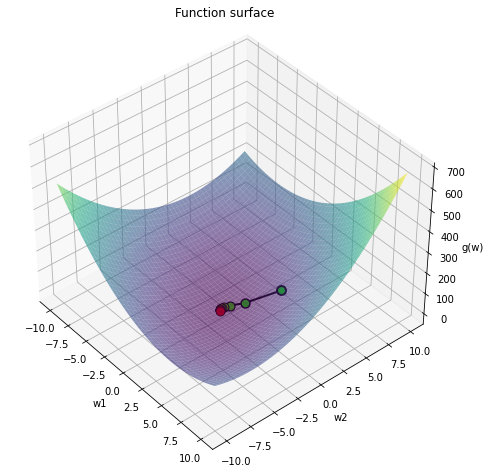

In [20]:
w, w_history = gradientDescent_func2(g, lr= 0.1, w_0=np.array([[3],[3]]))

# Squeeze w vectors for plotting
for i in range(len(w_history)):
    w = w_history[i]
    w_history[i] = np.squeeze(w)

plotFunction(g, w_history, view=(40,-40),w_min=-10, w_max=10)

number of iterations 15
w_0
[[1]
 [1]]
found minimum
[[ 0.14028009]
 [-1.30694335]]


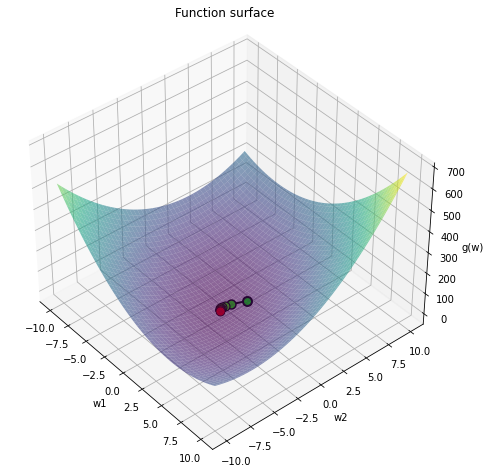

In [21]:
w, w_history = gradientDescent_func2(g, lr= 0.1, w_0=np.array([[1],[1]]))

# Squeeze w vectors for plotting
for i in range(len(w_history)):
    w = w_history[i]
    w_history[i] = np.squeeze(w)

plotFunction(g, w_history, view=(40,-40),w_min=-10, w_max=10)

**(10 points)** Fill in the tables below using different w_0 parameters. Step size for gradient descent is fixed as 0.1.

| Newton's method   | Number of iterations |         Found minimum      |
|-------------------|----------------------|----------------------------|
| w0 = (9, 9)       |           2          |[[ 0.16666667][-1.33333333]]|
| w0 = (7, 7)       |           2          |[[ 0.16666667][-1.33333333]]|
| w0 = (5, 5)       |           2          |[[ 0.16666667][-1.33333333]]|
| w0 = (3, 3)       |           2          |[[ 0.16666667][-1.33333333]]|
| w0 = (1, 1)       |           2          |[[ 0.16666667][-1.33333333]]|

| Gradient Descent  | Number of iterations |         Found minimum      |
|-------------------|----------------------|----------------------------|
| w0 = (9, 9)       |          15          |[[ 0.14028868][-1.30693476]]|
| w0 = (7, 7)       |          15          |[[ 0.14028653][-1.30693691]]|
| w0 = (5, 5)       |          15          |[[ 0.14028438][-1.30693906]]|
| w0 = (3, 3)       |          15          |[[ 0.14028224][-1.30694121]]|
| w0 = (1, 1)       |          15          |[[ 0.14028009][-1.30694335]]|

**(5 points)** Compare and interpret the results. What did you observe? Which one of the approaches was better? Explain.

I observed that Newton's method finds the optimal point with low number of iterations. Gradient descent takes more time. Another disadvantage of Gradient descent is that it doesn't find the exact minimum point, since it only approximates. For this problem the minimum w1 and w2 values are 1/6 and -4/3 respectively. Newton's method exactly finds this optimal point which minimizes the value of the loss function (function 2 above). Gradient descent requires learning rate parameter and this value is used as step size and it seems to miss of optimal point for this specific setting. When the loss function is convex (when we are sure by checking the eigenvalues of hessian matrix and find out that all of them are positive) which is our case right now, it is better to use Newton's method. The reason is that it provides faster convergence and requires no learning rate. Therefore I would prefer to use Newton's method over Gradient descent.

# Part 2: Gradient Descent for Logistic Regression (15 Points)

### Background

 - You can refer to Machine Learning Blinks 6 for related lecture video: https://www.youtube.com/watch?v=vZxE5XUdFyM&list=PLug43ldmRSo1LDlvQOPzgoJ6wKnfmzimQ&index=25

In logistic regression, the aim is to minimize the "Least Squares cost" function, which is:

$g(b, w)=\sum_{p=1}^{P}\left(\sigma\left(b+\mathbf{x}_{p}^{T} \mathbf{w}\right)-y_{p}\right)^{2}$

where $\mathbf{x}_{p}=\left[\begin{array}{llll}x_{1, p} & x_{2, p} & \dots & x_{N, p}\end{array}\right]^{T}$ and $\mathbf{w}_{p}=\left[\begin{array}{llll}w_{1} & w_{2} & \dots & w_{N}\end{array}\right]^{T}$.

The gradient descent step with respect to above Least Squares cost function is then:

$\Delta g(\tilde{w})=2 \sum_{p=1}^{P}\left(\sigma\left(\tilde{x}_{p}^{T} \tilde{w}\right)-y_{p}\right) \sigma\left(\tilde{x}_{p}^{T} \tilde{w}\right)\left(1-\sigma\left(\tilde{x}_{p}^{T} \tilde{w}\right)\right) \tilde{x}_{p}$

This step can be written more compactly by denoting

$\begin{aligned} \sigma_{p}^{k-1} &=\sigma\left(\tilde{\mathbf{x}}_{p}^{T} \tilde{\mathbf{w}}^{k-1}\right) \\ r_{p}^{k-1} &=2\left(\sigma_{p}^{k-1}-y_{p}\right) \sigma_{p}^{k-1}\left(1-\sigma_{p}^{k-1}\right) \end{aligned}$

for all $p=1, \ldots, P$ and $\mathbf{r}^{k-1}=\left[\begin{array}{llll}r_{1}^{k-1} & r_{2}^{k-1} & \ldots & r_{P}^{k-1}\end{array}\right]^{T}$, and stacking the $\tilde{\mathbf{x}}_{p}$ column-wise into the matrix $\tilde{\mathbf{X}}$. Then the gradient can be written as:

$\Delta g\left(\tilde{\mathbf{w}}^{k-1}\right)=\tilde{\mathbf{X}} \mathbf{r}^{k-1}$

For programming languages like Python and MATLAB/OCTAVE that have especially efficient implementations of matrix/vector operations this can be much more efficient than explicitly summing over the P points. In other words, these steps are shown for programming simplicity on Python/Matlab like languages.

### Complete gradient descent function

In this exercise you will reproduce the gradient descent paths shown in the Figure below:

<img src="https://web.itu.edu.tr/kamard/Fig3_1_note.png" style="width: 600px;" />

The surface in this figure was generated using the code below with the dataset $bacteria\_data.csv$, and you must complete a short gradient descent function to produce the descent paths called

$[i n, o u t]=g r a d_{-} d e s c e n t\left(\tilde{\mathbf{X}}, \mathbf{y}, \tilde{\mathbf{w}}^{0}\right)$

where "in" and "out" contain the gradient steps $\tilde{\mathbf{w}}^{k}=\tilde{\mathbf{w}}^{k-1}-\alpha_{k} \nabla g\left(\tilde{\mathbf{w}}^{k-1}\right)$ taken corresponding objective value $g\left(\tilde{\mathbf{w}}^{k}\right)$ respectively, $\tilde{\mathbf{X}}$ is the input data matrix, $y$ the output values and $\tilde{\mathbf{w}}^{0}$ the initial point.

Almost all of this function has already been constructed for you. For example, the step length is fixed at $\alpha_{k}=10^{-2}$ for all iterations, etc., and you must only enter the gradient of the associated cost function. Pressing "run" in the editor will run gradient descent and will reproduce __Figure 1__.

In [22]:
# This part is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

Load data and plot.

In [23]:
#THIS PART IS USED IN BOTH PART 2 AND PART 3
def sigmoid(X):
    return 1/(1+math.e**(-X))

def calculate_grad(X,y,w): #TODO: write comment here
    pred = sigmoid(np.dot(X, w))
    error = pred - y
    temp = np.multiply(error, pred)
    temp = np.multiply(temp, (1 - pred))
    temp = np.dot(X.T, temp)
    grad = 2 * temp # TODO: should we divide by n(number of samples)?
    return grad

In [24]:
# load the data
def load_data(csvname):
    data = np.asarray(pd.read_csv(csvname,header = None))
    x = data[:,0]
    x.shape = (np.size(x),1)
    temp = np.ones((np.size(x),1))
    X = np.concatenate((temp,x),1)
    y = data[:,1]
    y = y/y.max()
    y.shape = (np.size(y),1)
    return X,y

Functionality required for a proper gradient descent algorithm.

In [25]:
# run gradient descent
def gradient_descent(X,y,w0):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(w0)
    cost = compute_cost(w0)
    cost_path.append(cost)
    w = w0
    
    # start gradient descent loop
    max_its = 5000
    alpha = 10**(-2)
    for k in range(max_its):
        # compute gradient  
        grad = calculate_grad(X,y,w)
        
        # take gradient step
        w = w - alpha*grad
        
        # update path containers
        w_path.append(w)
        cost = compute_cost(w)
        cost_path.append(cost)

    # reshape containers for use in plotting in 3d
    w_path = np.asarray(w_path)
    w_path.shape = (np.shape(w_path)[0],np.shape(w_path)[1])
    return w_path,cost_path

# calculate the cost value for a given input weight w
def compute_cost(w):
    temp = 1/(1 + my_exp(-np.dot(X,w))) - y
    temp = np.dot(temp.T,temp)
    return temp[0][0]

# avoid overflow when using exp - just cutoff after arguments get too large/small
def my_exp(u):
    s = np.argwhere(u > 100)
    t = np.argwhere(u < -100)
    u[s] = 0
    u[t] = 0
    u = np.exp(u)
    u[t] = 1
    return u

Plotting functions necessary to producing the data, fit, cost surface, and descent points.

In [26]:
# used by plot_logistic_surface to make objective surface of logistic regression cost function
def add_layer(a,b,c):
    a.shape = (2,1)
    b.shape = (1,1)
    z = my_exp(-np.dot(c,a))
    z = 1/(1 + z) - b
    z = z**2
    return z

# plot fit to data and corresponding gradient descent path onto the logistic regression objective surface
def show_fit(w_path,ax,col):
    # plot solution of gradient descent fit to original data
    s = np.linspace(0,25,100)
    t = 1/(1 + my_exp(-(w_path[-1][0] + w_path[-1][1]*s)))
    ax.plot(s,t,color = col)

# plot gradient descent paths on cost surface
def show_paths(w_path,cost_path,ax,col):           
    # plot grad descent path onto surface
    ax.plot(w_path[:,0],w_path[:,1],cost_path,color = col,linewidth = 5)   # add a little to output path so its visible on top of the surface plot
    
# plot logistic regression surface
def plot_surface(ax):
    # plot logistic regression surface
    r = np.linspace(-3,3,100)
    s,t = np.meshgrid(r, r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    # build 3d surface
    surf = np.zeros((np.size(s),1))
    max_its = np.size(y)
    for i in range(0,max_its):
        surf = surf + add_layer(X[i,:],y[i],h)

    # reshape 
    s = np.reshape(s,(100,100))
    t = np.reshape(t,(100,100))
    surf = np.reshape(surf,(100,100))

    # plot 3d surface
    ax.plot_surface(s,t,surf,cmap = 'jet')
    ax.azim = 175
    ax.elev = 20
    
# plot points
def plot_points(X,y,ax):
    ax.plot(X[:,1],y,'ko')

Now that everything is defined we can run all.

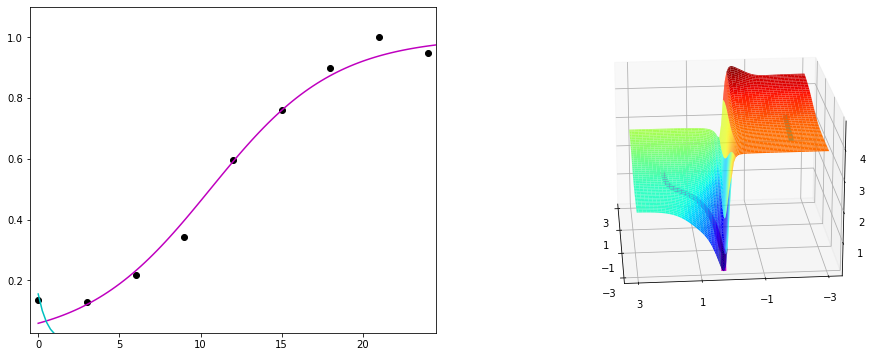

In [27]:
# load dataset
X,y = load_data('bacteria_data.csv') # load in data

# initialize figure, plot data, and dress up panels with axes labels etc.,
fig = plt.figure(facecolor = 'white',figsize = (16,6))
ax1 = fig.add_subplot(121)
ax1.set_xlim(min(X[:,1])-0.5, max(X[:,1])+0.5)
ax1.set_ylim(min(y)-0.1,max(y)+0.1)
#ax1.axis('off')

ax2 = fig.add_subplot(122, projection='3d')
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.zaxis.set_rotate_label(False)
ax2.get_xaxis().set_ticks([-3,-1,1,3])
ax2.get_yaxis().set_ticks([-3,-1,1,3])
# ax2.axis('off')

### run gradient descent with first initial point
w0 = np.array([0,2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0)

# plot points
plot_points(X,y,ax1)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'m')
show_paths(w_path,cost_path,ax2,'m')


### run gradient descent with first initial point
w0 = np.array([0,-2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'c')
show_paths(w_path,cost_path,ax2,'c')
plot_surface(ax2)
plt.show()

# Part 3: Gradient Descent for $\ell_{2}$ Regularized Logistic Regression (10 Points)

### Background

- You can refer to Machine Learning Blinks 6 for related lecture video: https://www.youtube.com/watch?v=vZxE5XUdFyM&list=PLug43ldmRSo1LDlvQOPzgoJ6wKnfmzimQ&index=25

The Least Squares cost function of $\ell_{2}$ regularized Logistic regression is:

$g(b, w)=\sum_{p=1}^{P}\left(\sigma\left(b+x_{p}^{T} w\right)-y_{p}\right)^{2}+\lambda\|w\|_{2}^{2}$

The gradient of the cost function can be written as: 

$\nabla g(\tilde{\mathbf{w}})=2 \sum_{p=1}^{P}\left(\sigma\left(\tilde{\mathbf{x}}_{p}^{T} \tilde{\mathbf{w}}\right)-y_{p}\right) \sigma\left(\tilde{\mathbf{x}}_{p}^{T} \tilde{\mathbf{w}}\right)\left(1-\sigma\left(\tilde{\mathbf{x}}_{p}^{T} \tilde{\mathbf{w}}\right)\right) \tilde{\mathbf{x}}_{\mathbf{p}}+2 \lambda\left[\begin{array}{l}0 \\ \mathbf{w}\end{array}\right]$

### Complete the gradient descent function

<img src="https://web.itu.edu.tr/kamard/Fig3_2_note.png" style="width: 600px;" />

In this exercise you will reproduce __Figure 2__ by coding up gradient descent to minimize the regularized logistic regression Least Squares cost function. The surface in the figure was generated using the code below with the dataset $bacteria\_data.csv$, and you must complete a short gradient descent function to produce the descent paths called

$[i n, o u t]=g r a d_{-} d e s c e n t\left(\tilde{\mathbf{X}}, \mathbf{y}, \tilde{\mathbf{w}}^{0}\right)$

where "in" and "out" contain the gradient steps $\tilde{\mathbf{w}}^{k}=\tilde{\mathbf{w}}^{k-1}-\alpha_{k} \nabla g\left(\tilde{\mathbf{w}}^{k-1}\right)$ taken corresponding objective value $g\left(\tilde{\mathbf{w}}^{k}\right)$ respectively, $\tilde{\mathbf{X}}$ is the input data matrix, $y$ the output values and $\tilde{\mathbf{w}}^{0}$ the initial point.

Almost all of this function has already been constructed for you. For example, the step length is fixed at $\alpha_{k}=10^{-2}$ for all iterations, etc., and you must only enter the gradient of the associated cost function. Pressing "run" in the editor will run gradient descent and will reproduce __Figure 2__.

In [28]:
# This part is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

Load data and plot.

In [29]:
# load the data
def load_data(csvname):
    data = np.asarray(pd.read_csv(csvname,header = None))
    x = data[:,0]
    x.shape = (np.size(x),1)
    temp = np.ones((np.size(x),1))
    X = np.concatenate((temp,x),1)
    y = data[:,1]
    y = y/y.max()
    y.shape = (np.size(y),1)
    return X,y

Functionality required for a proper gradient descent algorithm.

In [30]:
def calculate_L2_grad(X, w):
    n = X.shape[0]
        
    L2_grad = (2/n) * lam * np.sum(w) # TODO: is there 2 or not?
    
    return L2_grad

def gradient_descent(X,y,w0,lam):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(w0)
    cost = compute_cost(w0)
    cost_path.append(cost)
    w = w0
    
    # start gradient descent loop
    max_its = 5000
    alpha = 10**(-2)
    for k in range(max_its):
        # compute gradient
        grad = calculate_grad(X,y,w) + calculate_L2_grad(X,w) # calculate_grad function is already defined in part B and it is reused here

        # take gradient step
        w = w - alpha*grad

        # update path containers
        w_path.append(w)
        cost = compute_cost(w)
        cost_path.append(cost)

    # reshape containers for use in plotting in 3d
    w_path = np.asarray(w_path)
    w_path.shape = (np.shape(w_path)[0],np.shape(w_path)[1])
    return w_path,cost_path

# calculate the cost value for a given input weight w
def compute_cost(w):
    temp = 1/(1 + my_exp(-np.dot(X,w))) - y
    temp = np.dot(temp.T,temp)
    return temp[0][0]

# avoid overflow when using exp - just cutoff after arguments get too large/small
def my_exp(u):
    s = np.argwhere(u > 100)
    t = np.argwhere(u < -100)
    u[s] = 0
    u[t] = 0
    u = np.exp(u)
    u[t] = 1
    return u

Plotting functions necessary to producing the data, fit, cost surface, and descent points.

In [31]:
# used by plot_logistic_surface to make objective surface of logistic regression cost function
def add_layer(a,b,c):
    a.shape = (2,1)
    b.shape = (1,1)
    z = my_exp(-np.dot(c,a))
    z = 1/(1 + z) - b
    z = z**2
    return z

# plot fit to data and corresponding gradient descent path onto the logistic regression objective surface
def show_fit(w_path,ax,col):
    # plot solution of gradient descent fit to original data
    s = np.linspace(0,25,100)
    t = 1/(1 + my_exp(-(w_path[-1,0] + w_path[-1,1]*s)))
    ax.plot(s,t,color = col)

# plot gradient descent paths on cost surface
def show_paths(w_path,cost_path,ax,col):           
    # plot grad descent path onto surface
    ax.plot(w_path[:,0],w_path[:,1],cost_path,color = col,linewidth = 5)   # add a little to output path so its visible on top of the surface plot
    
# plot logistic regression surface
def plot_surface(ax,lam):
    # plot logistic regression surface
    r = np.linspace(-3,3,100)
    s,t = np.meshgrid(r, r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    # build 3d surface
    surf = np.zeros((np.size(s),1))
    max_its = np.size(y)
    for i in range(0,max_its):
        surf = surf + add_layer(X[i,:],y[i],h)
    surf = surf + lam*t**2

    s = np.reshape(s,(100,100))
    t = np.reshape(t,(100,100))
    surf = np.reshape(surf,(100,100))
    
    # plot 3d surface
    ax.plot_surface(s,t,surf,cmap = 'jet')
    ax.azim = 175
    ax.elev = 20
    
# plot points
def plot_points(X,y,ax):
    ax.plot(X[:,1],y,'ko')

Now that everything is defined we can run all.

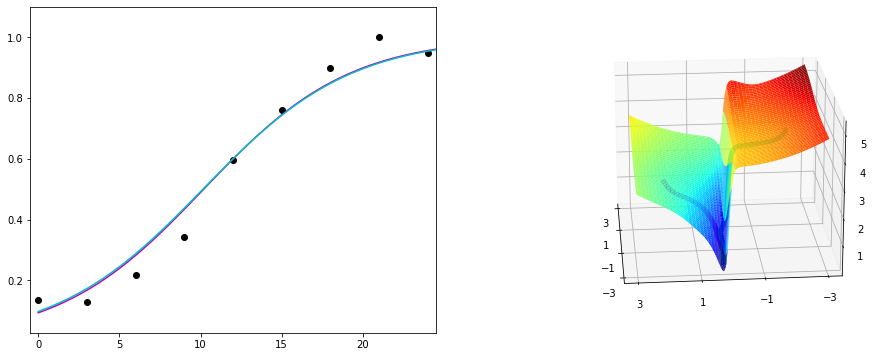

In [32]:
# load dataset
X,y = load_data('bacteria_data.csv') # load in data

# initialize figure, plot data, and dress up panels with axes labels etc.,
fig = plt.figure(facecolor = 'white',figsize = (16,6))
ax1 = fig.add_subplot(121)
ax1.set_xlim(min(X[:,1])-0.5, max(X[:,1])+0.5)
ax1.set_ylim(min(y)-0.1,max(y)+0.1)
#ax1.axis('off')

ax2 = fig.add_subplot(122, projection='3d')
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.zaxis.set_rotate_label(False)
ax2.get_xaxis().set_ticks([-3,-1,1,3])
ax2.get_yaxis().set_ticks([-3,-1,1,3])
# ax2.axis('off')

# define regularizer parameter
lam = 10**-1

### run gradient descent with first initial point
w0 = np.array([0,2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0,lam)

# plot points
plot_points(X,y,ax1)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'m')
show_paths(w_path,cost_path,ax2,'m')

### run gradient descent with first initial point
w0 = np.array([0,-2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0,lam)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'c')
show_paths(w_path,cost_path,ax2,'c')

plot_surface(ax2,lam)
plt.show()

## References
[1] Watt, J., Borhani, R., and Katsaggelos, A. (2016). Machine Learning Refined: Foundations, Algorithms, and Applications. Cambridge: Cambridge University Press. doi:10.1017/CBO9781316402276

[2] Jianqiang Lin, Sang-Mok Lee, Ho-Joon Lee, and Yoon-Mo Koo. Modeling of typical microbial cell growth in batch culture. Biotechnology and Bioprocess Engineering, 5(5) 382385, 2000.